# Titanic
## Objective
The main objective of this analysis is to predict the survival of passengers from the sinking Titanic. This dataset is obtained from the Titanic Machine Learning competition in Kaggle. It consists of 891 rows and 12 columns. Column names, their descriptions and data types are shown below:

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys, seaborn as sns
os.chdir('data')
from colorsetup import colors, palette
sns.set_palette(palette)

In [51]:
filepath= 'titanic_train.csv'
df = pd.read_csv(filepath)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Data Cleaning and Feature Engineering
1. Check if there are any null values in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
null_values=pd.DataFrame(df.isnull().sum()).rename(columns={0:'No. of null values'})
null_values

,No. of null values
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


‘Age’, ‘Cabin’ and ‘Embarked’ have null values as shown in Figure 1. We shall drop ‘Cabin’ columns because it has too many null values and it is difficult to assume what values to input for ‘Cabin’. Null values in ‘Age’ and ‘Embarked’ can be filled in with mean and mode values respectively.

In [5]:
df['Age'].fillna(df.Age.mean(), inplace=True)
df['Embarked'].fillna(df.Embarked.mode()[0], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


2. Drop any features with unique values because they do not add value to the model.

In [6]:
pd.DataFrame(df.nunique()).rename(columns={0:'No. of unique values'})

,No. of unique values
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,89
SibSp,7
Parch,7
Ticket,681
Fare,248


‘PassengerId’ has 891 unique values so it should be removed from the model as it does not value add to the model. ‘Ticket’ and ‘Fare’ are believed to be generated randomly so they should be removed from the model too.

In [7]:
df = df.drop(['PassengerId','Ticket','Fare','Cabin'], axis=1)

In [8]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S


In [9]:
#adding new column 'family_size'
family_size=[]
for row in range(df.shape[0]):
    family_size.append(df['SibSp'][row] + df['Parch'][row])

family_size = pd.Series(family_size)
family_size

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

In [10]:
df = pd.concat([df, family_size], axis=1)

In [11]:
df = df.rename(columns={0:'family_size'})
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,family_size
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,S,1
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,S,0
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,S,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,S,3
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,C,0


In [12]:
#splitting name to find salutation
df[['Last Name','Salutation']]=df['Name'].str.split(',', expand=True)
df[['Salutation','First Name']] = df['Salutation'].str.split('.', n=1,  expand=True)

df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,family_size,Last Name,Salutation,First Name
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,S,1,Braund,Mr,Owen Harris
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,C,1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,S,0,Heikkinen,Miss,Laina
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,S,1,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,S,0,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,S,0,Montvila,Rev,Juozas
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,S,0,Graham,Miss,Margaret Edith
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,S,3,Johnston,Miss,"Catherine Helen ""Carrie"""
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,C,0,Behr,Mr,Karl Howell


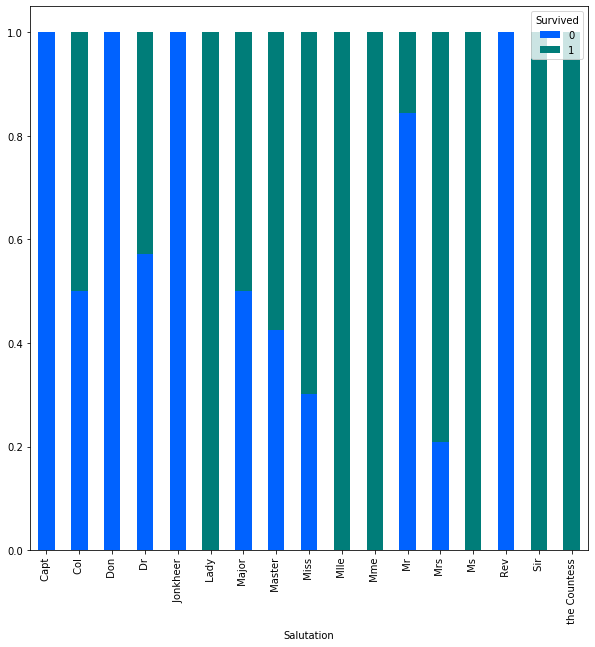

In [13]:
pd.crosstab(df['Salutation'], df['Survived'], normalize='index').plot.bar(stacked=True, fontsize=10, figsize=(10,10))

3. Add new features to add more insights to the data. ‘family_size’ column could be added to show insight to which passenger is alone on the ship. We could derive the family size based on ‘Parch’ and ‘SibSp’. If the passenger is alone, ‘Parch’ and ‘SibSp’ are zero. As can been seen below, those who are alone or have a family bigger than 7 have a higher chance of not surviving. We could also add a ‘Salutation’ column derived from ‘Name’. From Figure 2, those who are ‘Mr’, ‘Capt’, ‘Don’, ‘Jonkheer’ and Rev’ have a higher chance of not surviving compared to ‘Miss’, ‘Mrs’, ‘the Countess’, ‘Sir’, ‘Ms’, ‘Mme’ and ‘Lady’.

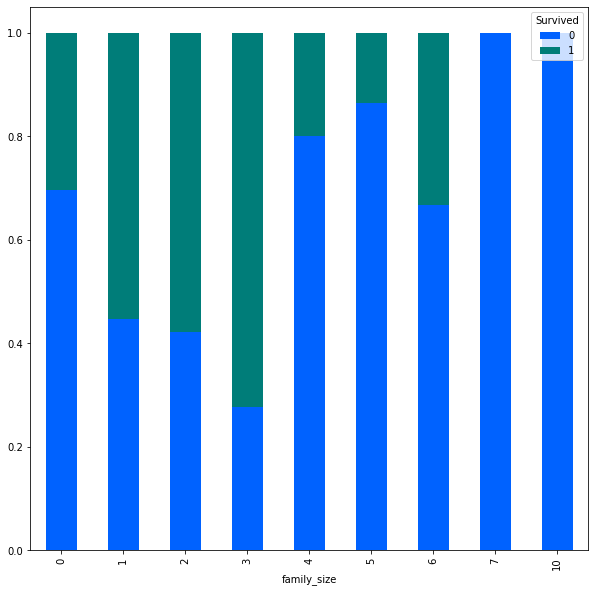

In [14]:
fam = pd.crosstab(df['family_size'], df['Survived'], normalize='index')
fam.plot.bar(stacked=True, fontsize=10, figsize=(10,10))

In [15]:
#determine the columns that are string
mask = df.dtypes == np.object
categorical_cols = df.columns[mask]
categorical_cols

Index(['Name', 'Sex', 'Embarked', 'Last Name', 'Salutation', 'First Name'], dtype='object')

In [16]:
#drop 'Name', 'Last Name', "First Name" column
categorical_cols=categorical_cols.drop(['Name','Last Name','First Name'])

In [17]:
categorical_cols

Index(['Sex', 'Embarked', 'Salutation'], dtype='object')

In [18]:
#determine how many extra columns would be added
num_ohc_cols = (df[categorical_cols]
               .apply(lambda x: x.nunique())
               .sort_values(ascending=False))
num_ohc_cols

Salutation    17
Embarked       3
Sex            2
dtype: int64

4. Check for string categorical variables and use One-hot encoding to convert all string categorical variables to binary dummies. Since ‘Sex’, ‘Embarked’ and ‘Salutation’ are string data types, we will convert them into binary dummies using One-hot encoding. 
    
    ‘Salutation’ has 17 unique values, ‘Embarked’ has 3 unique values and ‘Sex’ has 2 unique values. All these will add new columns to the data set.

In [19]:
#one-hot encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

df_ohc = df.copy()

le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    data = le.fit_transform(df_ohc[col]).astype(np.int)
    df_ohc = df_ohc.drop(col, axis=1)
    new_data = ohc.fit_transform(data.reshape(-1,1))
    n_cols = new_data.shape[1]
    col_name = ['_'.join([col, str(x)]) for x in range(n_cols)]
    
    new_df = pd.DataFrame (new_data.toarray(),
                          index = df_ohc.index,
                          columns = col_name)
    
    df_ohc = pd.concat([df_ohc, new_df], axis=1)

df_ohc

,Survived,Pclass,Name,Age,SibSp,Parch,family_size,Last Name,First Name,Salutation_0,...,Salutation_12,Salutation_13,Salutation_14,Salutation_15,Salutation_16,Embarked_0,Embarked_1,Embarked_2,Sex_0,Sex_1
0,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,1,Braund,Owen Harris,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,1,Cumings,John Bradley (Florence Briggs Thayer),0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,0,Heikkinen,Laina,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,1,Futrelle,Jacques Heath (Lily May Peel),0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0,3,"Allen, Mr. William Henry",35.000000,0,0,0,Allen,William Henry,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.000000,0,0,0,Montvila,Juozas,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
887,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,0,Graham,Margaret Edith,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,3,Johnston,"Catherine Helen ""Carrie""",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
889,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,0,Behr,Karl Howell,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [20]:
df_ohc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Name           891 non-null    object 
 3   Age            891 non-null    float64
 4   SibSp          891 non-null    int64  
 5   Parch          891 non-null    int64  
 6   family_size    891 non-null    int64  
 7   Last Name      891 non-null    object 
 8   First Name     891 non-null    object 
 9   Salutation_0   891 non-null    float64
 10  Salutation_1   891 non-null    float64
 11  Salutation_2   891 non-null    float64
 12  Salutation_3   891 non-null    float64
 13  Salutation_4   891 non-null    float64
 14  Salutation_5   891 non-null    float64
 15  Salutation_6   891 non-null    float64
 16  Salutation_7   891 non-null    float64
 17  Salutation_8   891 non-null    float64
 18  Salutation

In [21]:
#in this case, only Age is the relevant float column
cateforical_cols_float=df_ohc['Age'].skew()
cateforical_cols_float

0.4344880940129925

5. Check for skewness of the columns. With the skew limit as 0.75, any features will more than an absolute value of 0.75 will be log transformed. 

    In this case, only ‘Age’ is the relevant float variable. However, ‘Age’ skew value is only 0.434 which does not meet our criteria of 0.75. So, we do not have to perform log transformation on any features.

In [22]:
df_ohc['Survived'].value_counts(normalize=True).mul(100)

0    61.616162
1    38.383838
Name: Survived, dtype: float64

6. Check if the dataset is balanced or unbalanced. To check if the dataset is balanced or not, we have to sum up all the passengers who have survived and those who have not survived. 
    
    Passengers who did not survive represent 61.6% of the data set while passengers who survived represent 38.4% of the data set. This shows that the data set is slightly unbalanced and we will need to use Stratified KFold to maintain the representation.

In [23]:
from sklearn.model_selection import StratifiedKFold

X = [x for x in df_ohc.columns if x not in ['Survived', 'Name', 'First Name', 'Last Name']]
y = df_ohc['Survived']


kf = StratifiedKFold(n_splits=4, shuffle=True, random_state = 42)

train_ind, test_ind = next(kf.split(df_ohc[X], y))

X_train = df_ohc.loc[train_ind, X]
y_train = df_ohc.loc[train_ind, 'Survived']

X_test = df_ohc.loc[test_ind, X]
y_test = df_ohc.loc[test_ind, 'Survived']

In [24]:
y_train.value_counts(normalize=True)

0    0.615269
1    0.384731
Name: Survived, dtype: float64

In [25]:
y_test.value_counts(normalize=True)

0    0.618834
1    0.381166
Name: Survived, dtype: float64

In [26]:
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(668, 27) (668,) (223, 27) (223,)


## Classifier Models
### Logistic Regression with Regularization

In [27]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

estimator = Pipeline([("scaler", StandardScaler()),
                     ("LR", LogisticRegression(max_iter=500))])

param ={
    'LR__solver':['liblinear', 'saga','newton-cg','lbfgs','sag'],
    'LR__penalty':['l1','l2', 'elasticnet', 'none']
}

grid = GridSearchCV(estimator, param)
grid.fit(X_train, y_train)

C:\Users\WeiEn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WeiEn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WeiEn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\WeiEn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg suppo

C:\Users\WeiEn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WeiEn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WeiEn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WeiEn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\WeiEn\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('LR',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=500,
                                                           multi_class='auto',
           

In [28]:
grid.best_score_, grid.best_params_

(0.8233643811020087, {'LR__penalty': 'l2', 'LR__solver': 'liblinear'})

In [29]:
from sklearn.metrics import classification_report

y_pred_LR = grid.predict(X_test)

report_LR = classification_report(y_test, y_pred_LR, output_dict=True)
report_LR_df = pd.DataFrame(report_LR).transpose()
report_LR_df

,precision,recall,f1-score,support
0,0.865672,0.840580,0.852941,138.000000
1,0.752809,0.788235,0.770115,85.000000
accuracy,0.820628,0.820628,0.820628,0.820628
macro avg,0.809240,0.814408,0.811528,223.000000
weighted avg,0.822652,0.820628,0.821371,223.000000


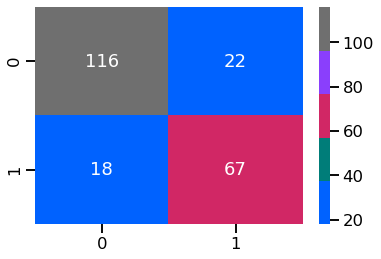

In [30]:
from sklearn.metrics import confusion_matrix

sns.set_context('talk')
cm_LR = confusion_matrix(y_test, y_pred_LR)
ax = sns.heatmap(cm_LR, annot=True, fmt='d', cmap=colors)

Using GridSearchCV, the best solver is ‘liblinear’ and the best regularization is L2 Ridge Regularization. Confusion matrix is generated above.

### Extra Trees

In [31]:
#ExtraTrees
from sklearn.ensemble import ExtraTreesClassifier

EF = ExtraTreesClassifier(oob_score=True,
                         random_state=42,
                         warm_start=True,
                         bootstrap=True,
                         n_jobs=-1)
s = StandardScaler()

X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

oob_list=list()

for n_trees in [5, 10, 15, 20, 25, 30, 40, 50, 100, 150, 200]:
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)
    
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))
    
et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

C:\Users\WeiEn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\WeiEn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\WeiEn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\WeiEn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\WeiEn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probab

,oob
n_trees,
5.0,0.247006
10.0,0.220060
15.0,0.226048
20.0,0.220060
25.0,0.217066
30.0,0.206587
40.0,0.205090
50.0,0.203593
100.0,0.212575


[Text(0, 0.5, 'out-of-bag-error')]

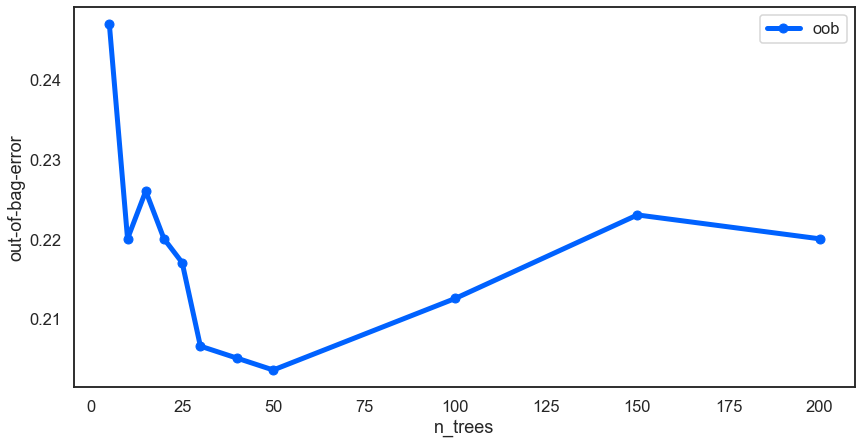

In [32]:
sns.set_context('talk')
sns.set_style('white')

ax = et_oob_df.plot(marker='o', figsize=(14,7), linewidth=5)
ax.set(ylabel='out-of-bag-error')

In [33]:
print ("Minimum out-of-bag error is", et_oob_df[et_oob_df.oob==et_oob_df.oob.min()] )

Minimum out-of-bag error is               oob
n_trees          
50.0     0.203593


In [34]:
EF_opt = EF.set_params(n_estimators=50)
y_pred_EF = EF_opt.predict(X_test)

report_EF = classification_report(y_test, y_pred_EF, output_dict=True)
report_EF_df = pd.DataFrame(report_EF).T
report_EF_df

,precision,recall,f1-score,support
0,0.818792,0.884058,0.850174,138.000000
1,0.783784,0.682353,0.729560,85.000000
accuracy,0.807175,0.807175,0.807175,0.807175
macro avg,0.801288,0.783205,0.789867,223.000000
weighted avg,0.805448,0.807175,0.804200,223.000000


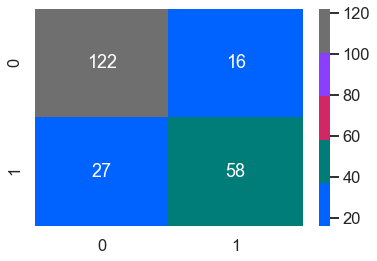

In [35]:
sns.set_context('talk')
cm_EF = confusion_matrix(y_test, y_pred_EF)
ax = sns.heatmap(cm_EF, annot=True, fmt='d', cmap=colors)

A range of trees [5, 10, 15, 20, 25, 30, 40, 50, 100, 150, 200] is run against ExtraTreesClassifier and out-of-bag error is generated as shown above. The number of trees that give the least out-of-bag error is 50. Confusion matrix is again generated above.

### Boosting
#### AdaBoost

In [36]:
#Boosting, AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ABC = AdaBoostClassifier (DecisionTreeClassifier(max_depth=1))

param_grid = {'n_estimators': [10, 20, 30, 40, 50, 100, 150, 200, 250, 300],
              'learning_rate': [1, 0.1, 0.01, 0.001]}

GV_ABC = GridSearchCV(ABC, 
                      param_grid= param_grid,
                      scoring='accuracy',
                      n_jobs=-1)

GV_ABC = GV_ABC.fit(X_train, y_train)

In [37]:
GV_ABC.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [38]:
y_pred_ABC = GV_ABC.predict(X_test)
report_ABC = classification_report(y_test, y_pred_ABC, output_dict=True)
report_ABC_df = pd.DataFrame(report_ABC).T
report_ABC_df

,precision,recall,f1-score,support
0,0.863309,0.869565,0.866426,138.000000
1,0.785714,0.776471,0.781065,85.000000
accuracy,0.834081,0.834081,0.834081,0.834081
macro avg,0.824512,0.823018,0.823746,223.000000
weighted avg,0.833733,0.834081,0.833889,223.000000


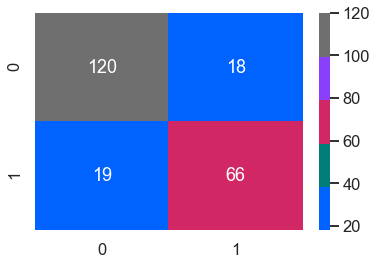

In [39]:
sns.set_context('talk')
cm_ABC = confusion_matrix(y_test, y_pred_ABC)
ax = sns.heatmap(cm_ABC, annot=True, fmt='d', cmap=colors)

In this case, AdaBoost was used for comparison. Using GridSearchCV, a range of parameters were run against Decision Tree Classifier. The best n_estimators is 100 and the best learning_rate is 0.1. Confusion matrix is generated above.

In [40]:
overall_df = pd.concat([report_LR_df, report_EF_df, report_ABC_df], keys=['LR','EF','ABC'])
overall_df

precision    recall  f1-score     support
LR  0              0.865672  0.840580  0.852941  138.000000
    1              0.752809  0.788235  0.770115   85.000000
    accuracy       0.820628  0.820628  0.820628    0.820628
    macro avg      0.809240  0.814408  0.811528  223.000000
    weighted avg   0.822652  0.820628  0.821371  223.000000
EF  0              0.818792  0.884058  0.850174  138.000000
    1              0.783784  0.682353  0.729560   85.000000
    accuracy       0.807175  0.807175  0.807175    0.807175
    macro avg      0.801288  0.783205  0.789867  223.000000
    weighted avg   0.805448  0.807175  0.804200  223.000000
ABC 0              0.863309  0.869565  0.866426  138.000000
    1              0.785714  0.776471  0.781065   85.000000
    accuracy       0.834081  0.834081  0.834081    0.834081
    macro avg      0.824512  0.823018  0.823746  223.000000
    weighted avg   0.833733  0.834081  0.833889  223.000000

Classification report was run for all the 3 models as shown above where LR represents Logistic Regression Classifier, EF represents Extra Trees Classifier and ABC represents AdaBoost Classifier. 

Based on the table above, AdaBoost is the best model because it has the highest weighted average F1 score.

## Key Findings and Insights
There were more passengers who did not survive the sinking Titanic then those who survived as mentioned in Data Exploration and Feature Engineering Section. 

In [44]:
df_ohc.columns

Index(['Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'family_size',
       'Last Name', 'First Name', 'Salutation_0', 'Salutation_1',
       'Salutation_2', 'Salutation_3', 'Salutation_4', 'Salutation_5',
       'Salutation_6', 'Salutation_7', 'Salutation_8', 'Salutation_9',
       'Salutation_10', 'Salutation_11', 'Salutation_12', 'Salutation_13',
       'Salutation_14', 'Salutation_15', 'Salutation_16', 'Embarked_0',
       'Embarked_1', 'Embarked_2', 'Sex_0', 'Sex_1'],
      dtype='object')

### Before processing

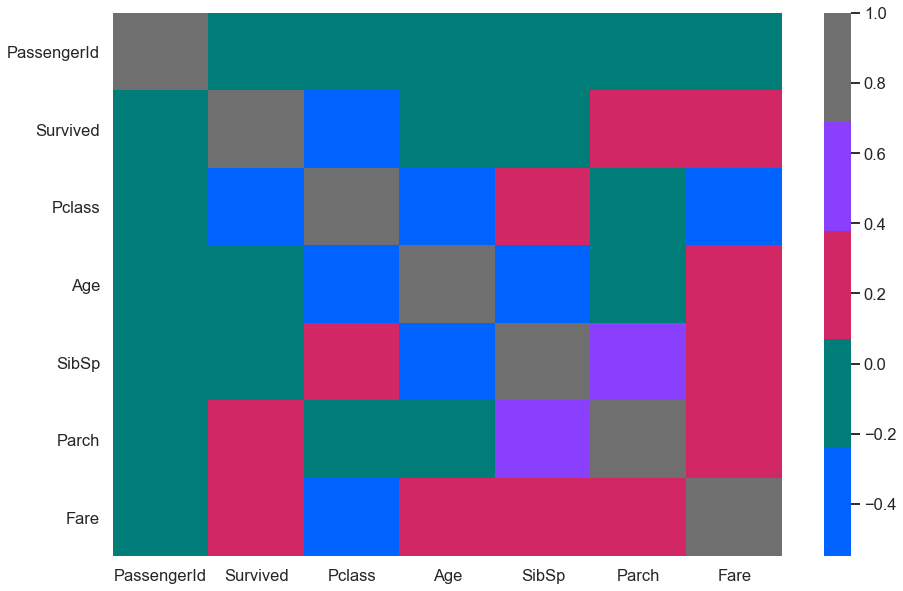

In [52]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), cmap=colors)

### After processing

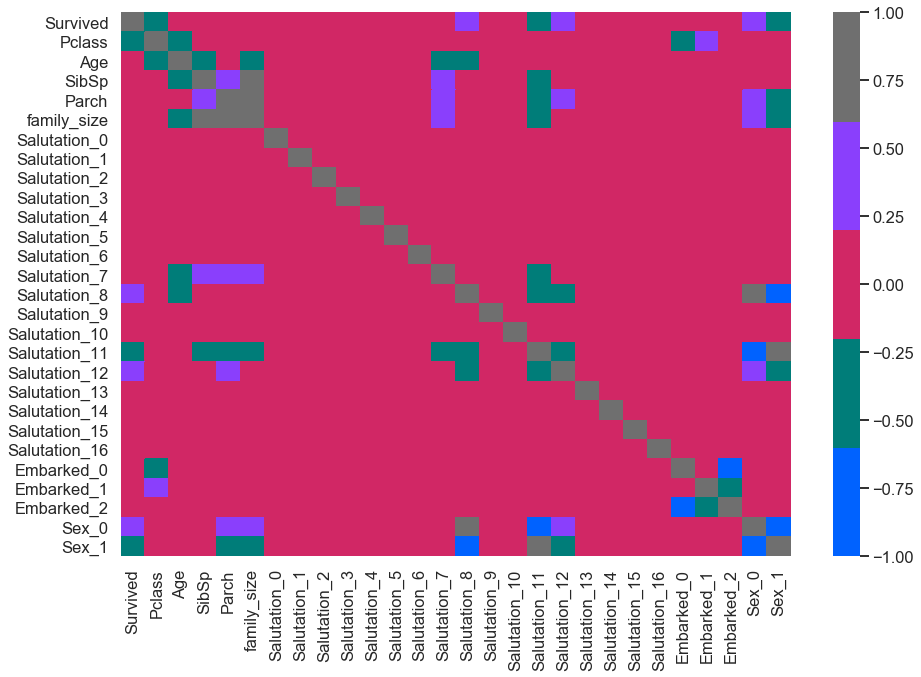

In [49]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_ohc.corr(), cmap=colors)

Comparing the heatmap above, it shows that some of the ‘Salutation’ do have some correlations to survival rate. ‘Sex’ also has an impact on survival rate. It seems that ‘family size’ does not have much correlation to survival rate as previously thought. 

## Future Works
For the next steps, we could tune some more parameters in the model. As shown above, it seems that ‘Fare’ do have some correlations to survival rate. Perhaps we could add ‘Fare’ in and re-run the model again. We should also collect more data so that our models will be more accurate i.e. weight of passengers, etc. We could also try to run the data with other models to compare the F1 score and confusion matrix.